# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Wednesday, Feb 02, 2022 at 11:59pm**

## Table of Contents

- [Instructions](#si)
- [Introduction](#in)
- [Exercise 1: Introducing the dataset](#1)
- [Exercise 2: Exploratory data analysis (EDA)](#2)
- [Exercise 3: Preprocessing](#3)
- [Exercise 4: Building models](#4)
- [Exercise 5: Evaluating on the test set](#5)

## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config

## Instructions <a name="si"></a>
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may not work with a partner on this homework. Individual submissions are required.** 

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset <a name="1"></a>
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [2]:
census_df = pd.read_csv("adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 
rubric={points:4}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (60%) and `test_df` (40%) with `random_state = 1`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 60%/40% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_

In [3]:
train_df, test_df = train_test_split(census_df, test_size=0.4, random_state=1)
# print(train_df)
# print(test_df)

<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [4]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [5]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(19536, 15)

In [6]:
train_df_nan.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 Visualizing features
rubric={points:10}

**Your tasks:**

1. Examine the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. In case of `.describe()`, use the `include="all"` argument to show summary statistics of all  features.
2. Visualize the histograms of numeric features. 
3. From the visualizations, which features seem relevant for the given prediction task?

> Note: (Optional) If you're feeling excited about this you are welcome to use [`pandas_profiling`](https://github.com/pandas-profiling/pandas-profiling) for more elaborate visualization and EDA. 

In [7]:
print(train_df_nan.info())
print(train_df_nan.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19536 entries, 29859 to 29733
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19536 non-null  int64 
 1   workclass       18435 non-null  object
 2   fnlwgt          19536 non-null  int64 
 3   education       19536 non-null  object
 4   education.num   19536 non-null  int64 
 5   marital.status  19536 non-null  object
 6   occupation      18431 non-null  object
 7   relationship    19536 non-null  object
 8   race            19536 non-null  object
 9   sex             19536 non-null  object
 10  capital.gain    19536 non-null  int64 
 11  capital.loss    19536 non-null  int64 
 12  hours.per.week  19536 non-null  int64 
 13  native.country  19194 non-null  object
 14  income          19536 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.4+ MB
None
                 age workclass        fnlwgt education  education.num  \
count   195

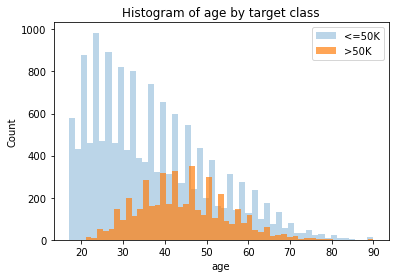

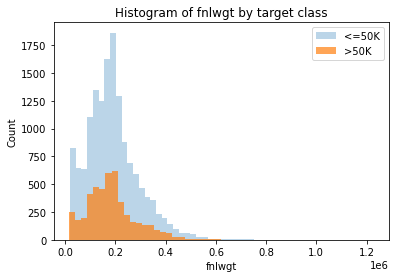

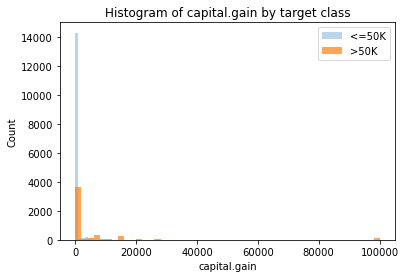

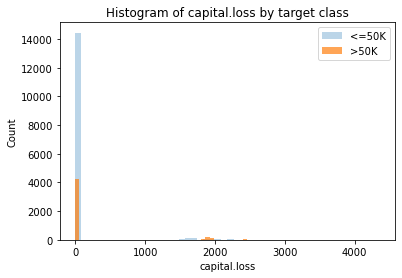

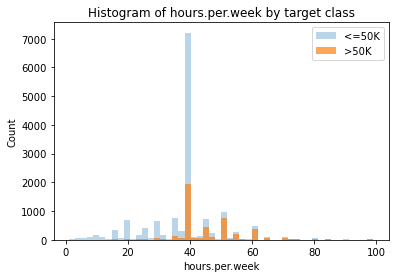

In [8]:
negative_examples = train_df_nan.query("income == '<=50K'")
positive_examples = train_df_nan.query("income == '>50K'")

# print(positive_examples)

numeric_features = [
    "age",
    "fnlwgt",
    # "education.num", I plan on dropping education.num because it is redundant column since education col already exists
    "capital.gain",
    "capital.loss",
    "hours.per.week",
]

for col in numeric_features:
    negative_col = negative_examples.loc[:, col]
    positive_col = positive_examples.loc[:, col]
    
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Histogram of " + col + " by target class")
    
    # added opacity to make graph look similar to the example histogram given above
    plt.hist(negative_col, label='<=50K', alpha=0.3, bins=50)
    plt.hist(positive_col, label='>50K', alpha=0.7, bins=50)
    
    plt.legend();
    plt.show()


Age appears to be relevant for the income prediction.

<br><br>

### 2.2 Identify transformations to apply
rubric={points:18}

**Your tasks:**
1. Identify the sequence of transformations that you would apply on each column in the dataset and fill in the table below accordingly. An example of the sequence of transformations to be applied on the `occupation` feature is shown in the table below. You may decide not to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. 
2. Are there common transformations you would like to apply on certain types of features? Identify different feature types for applying different transformations. In particular, fill in the lists below. 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. 

> Note: This question is a bit open-ended and there is no single correct solution.

| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, OHE |
| age | scaling |
| workclass | imputation, OHE  |
| fnlwgt | scaling  |
| education | ordinal encoding  |
| education.num | scaling |
| marital.status | OHE  |
| relationship | OHE |
| race | OHE |
| sex | OHE  |
| capital.gain | scaling |
| capital.loss | scaling |
| hours.per.week | scaling |
| native.country | imputation, OHE |


In [9]:
# Fill in the lists below. 
# It's OK to keep some of the lists empty or add new lists. 
numeric_features = ["age", "fnlwgt", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["occupation", "workclass", "marital.status", "relationship", "race", "native.country"]
ordinal_features = ["education" ]
binary_features = ["sex"]
drop_features = ["education.num"]
passthrough_features = []
target = "income"

In [10]:
train_df["education"].unique()

array(['Some-college', 'HS-grad', 'Bachelors', 'Assoc-voc', '10th',
       'Masters', 'Assoc-acdm', '9th', '11th', '7th-8th', 'Prof-school',
       'Doctorate', '1st-4th', '5th-6th', '12th', 'Preschool'],
      dtype=object)

In [11]:
#need to give sequential logical ordering to ordinal valeus
education_levels = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Prof-school",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate",
    
]

# make sure education_levels contain all the education values
assert set(education_levels) == set(train_df["education"].unique())

Race is  a good idea to include because there is a lot of evidence that employers discriminate based on race for many jobs that includes showbiz or even promotions due to many racial reasons. If we don't include race, we aren't truly reflecting the real-world "injustices" and our model will not be as accurate/reliable for predicting income for unseen examples.

<br><br>

### 2.3 Separating feature vectors and targets  
rubric={points:4}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. 
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not?

In [12]:
X_train = train_df_nan.drop(columns=[target])
y_train = train_df_nan[target]

X_test = test_df_nan.drop(columns=[target])
y_test = test_df_nan[target]

It will not work because we have not preprocessed our data yet. The SVC classifier/estimator only works with numerical data and non-null values. However, there are categorical features and NaN values present.

<br><br><br><br>

## Exercise 3: Preprocessing <a name="3"></a>
<hr>

### 3.1 Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**Your tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data from 2.2. 
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? 
3. Why do we need to use a column transformer in this case? Briefly explain. 

In [13]:
set_config(display="diagram")


numeric_transformer_scale = make_pipeline(StandardScaler()) # no imputation needed since no non-null values present for these columns in the training data.


categorical_transformer_imp_ohe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)

binary_transformer = make_pipeline(
    OneHotEncoder(drop="if_binary", dtype=int)
)

ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)


preprocessor = make_column_transformer(
    (numeric_transformer_scale, numeric_features),
    (categorical_transformer_imp_ohe, categorical_features),
    (binary_transformer, binary_features),
    (ordinal_transformer, ordinal_features),
    ("drop", drop_features),
)


preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'capital.gain',
                                  'capital.loss', 'hours.per.week']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['occupat...
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['sex']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Preschool',
                                                             '1st-4th',
                                                             '5th-6th',
                                                             '7th-8th', '9th',
                                                             '10th', '11th',
                                                             '12th', 'HS-grad',
                                                             'Prof-school',
                                                             'Assoc-voc',
                                                             'Assoc-acdm',
                                                             'Some-college',
                                                             'Bachelors',
                                                             'Masters',
                                                             'Doctorate']],
                                                dtype=<class 'int'>),
                                 ['education']),
                                ('drop', 'drop', ['education.num'])])

In [14]:
X_train_pp = preprocessor.fit_transform(X_train, y_train)
print(X_train_pp.shape)

(19536, 90)


X_train_pp has 19536 rows/examples and 90 columns/features.

We need to use a column transformer because we want to apply different transformations on different columns of data (numerical, categorical).

<br><br><br><br>

## Exercise 4: Building models <a name="4"></a>
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

In [15]:
results_dict = {} # dictionary to store all the results

In [16]:

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<br><br>

### 4.1 Baseline model 
rubric={points:6}

**Your tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier.  
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [17]:
base_pipe = make_pipeline(preprocessor, DummyClassifier(strategy="prior"))
# base_pipe

results_dict["dummy"] = mean_std_cross_val_scores(base_pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.038 (+/- 0.003),0.015 (+/- 0.002),0.763 (+/- 0.000),0.763 (+/- 0.000)


<br><br>

### 4.2 Trying different classifiers
rubric={points:14}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. 
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one?  

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [18]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

for key, val in models.items():
    pipe = make_pipeline(preprocessor, val)
    results_dict[key] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
    
    

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.038 (+/- 0.003),0.015 (+/- 0.002),0.763 (+/- 0.000),0.763 (+/- 0.000)
decision tree,0.128 (+/- 0.003),0.014 (+/- 0.000),0.811 (+/- 0.007),1.000 (+/- 0.000)
kNN,0.047 (+/- 0.005),0.979 (+/- 0.048),0.828 (+/- 0.004),0.878 (+/- 0.001)
RBF SVM,7.894 (+/- 0.165),3.587 (+/- 0.140),0.847 (+/- 0.006),0.850 (+/- 0.002)


Fit Time and Score Time:
dummy had the fastest fit_time which is expected because it simply uses the most frequent value in y_train.
RBF SVM had the longest fit_time and score_time.

All the validation scores for the models are much better than the dummy model's. RBF SVM (SVC) has the highest validation score/accuracy (0.847), then k-NN (0.828) and then Decision Tree (0.811). However, note that the training score for decision tree is 1 which likely indicates overfitting.

The fastest model is dummy with the shortest fit_time and score_time. The next fastest model is Decision Tree. Also note that k-NN and RBF SVM (SVC) is much slower than decision tree.


<br><br>

### (optional) 4.3 Exploring importance of scaling
rubric={points:1}

In this exercise you'll examine whether scaling helps in case of KNNs and SVM RBFs. 

**Your tasks:**

1. Create a column transformer without the `StandardScaler` step for `numeric_features`. 
2. Repeat the steps in 4.2 with this new column transformer. 
3. Compare the results of scaled numeric features with unscaled numeric features. Is scaling necessary for decision trees? Why or why not?

In [19]:
no_scale_dict = {}

preprocessor_no_scale = make_column_transformer(
    (categorical_transformer_imp_ohe, categorical_features),
    (binary_transformer, binary_features),
    (ordinal_transformer, ordinal_features),
    ("drop", drop_features),
)


X_train_pp_no_scale = preprocessor_no_scale.fit_transform(X_train)


models_no_scale = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

for key, val in models_no_scale.items():
    pipe_no_scale = make_pipeline(preprocessor_no_scale, val)
    no_scale_dict[key] = mean_std_cross_val_scores(pipe_no_scale, X_train, y_train, cv=5, return_train_score=True)
    
    

pd.DataFrame(no_scale_dict).T

,fit_time,score_time,test_score,train_score
decision tree,0.085 (+/- 0.002),0.013 (+/- 0.000),0.811 (+/- 0.007),0.874 (+/- 0.002)
kNN,0.043 (+/- 0.004),1.022 (+/- 0.045),0.807 (+/- 0.007),0.831 (+/- 0.004)
RBF SVM,8.874 (+/- 0.200),4.080 (+/- 0.106),0.825 (+/- 0.004),0.826 (+/- 0.002)


The fit_time and score_time is similar between scaled and unscaled data for all models.
The validation score and training score for k-NN and RBF SVM (SVC) is lower in the unscaled data which is expected because the feature with the largest magnitude of values will dominate even if the other features are equally relevant.

However, for decision tree, the validation scores are identical for both scaled and unscaled data. Therefore, scaling is not required for decision trees because decisions trees look at a single feature at a time at each node/split. It is not overwhelmed by multiple features at a time. However, k-NN and RBF SVM are overwhelmed, thus a lack of scaling lowered their validation scores.

### 4.4 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this might take a while. 

In [20]:
param_grid = {"C": np.logspace(-2, 2, 4)}

for param_val in param_grid["C"]:
    pipe_svc = make_pipeline(preprocessor, SVC(C=param_val))
    results_dict["SVC with C value: " + str(param_val)] = mean_std_cross_val_scores(pipe_svc, X_train, y_train, cv=5, return_train_score=True)
    

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.038 (+/- 0.003),0.015 (+/- 0.002),0.763 (+/- 0.000),0.763 (+/- 0.000)
decision tree,0.128 (+/- 0.003),0.014 (+/- 0.000),0.811 (+/- 0.007),1.000 (+/- 0.000)
kNN,0.047 (+/- 0.005),0.979 (+/- 0.048),0.828 (+/- 0.004),0.878 (+/- 0.001)
RBF SVM,7.894 (+/- 0.165),3.587 (+/- 0.140),0.847 (+/- 0.006),0.850 (+/- 0.002)
SVC with C value: 0.01,9.573 (+/- 0.088),4.756 (+/- 0.030),0.768 (+/- 0.001),0.768 (+/- 0.000)
SVC with C value: 0.21544346900318834,8.720 (+/- 0.651),4.043 (+/- 0.195),0.839 (+/- 0.005),0.840 (+/- 0.001)
SVC with C value: 4.6415888336127775,8.040 (+/- 0.126),3.375 (+/- 0.035),0.852 (+/- 0.006),0.855 (+/- 0.001)
SVC with C value: 100.0,11.016 (+/- 0.182),3.268 (+/- 0.124),0.853 (+/- 0.006),0.866 (+/- 0.001)


SVC with the hyperparamter C = 100 appears to be performing the best, as it has the best validation scores (0.853). Yes, this is different than the default value of C=1.

<br><br><br><br>

## Exercise 5: Evaluating on the test set <a name="5"></a>
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 5.1 Scoring on the unseen test set 
rubric={points:10}

**Your tasks:**

1. Train the best performing model on the entire training set. 
2. Report the results of this model on `X_test`. 
3. Are the cross-validation results and test results consistent? 

In [21]:
pipe_svc_best = make_pipeline(preprocessor, SVC(C=100))
pipe_svc_best.fit(X_train, y_train)


test_score = pipe_svc_best.score(X_test, y_test)
print("Test Score is: " + str(test_score))


Test Score is: 0.8551247600767754


The cross-validation and test score are consistent and very close to each other - differing by 0.002. The cross-validation score is 0.853 and the test score is even better at 0.855.

## Exercise 6: Summary

rubric={Pass/Fail}

You are all done with Homework 3! Your last task is reflecting on what you have learned and answering the following questions. **This task is necessary to pass HW3**. Failing to complete this task means you will not receive points for this assignment.

1. In about 100 words, describe what you have learned from this homework.
2. Write at least one well-formulated question on something that is still not clear about the content of this homework, or you would like to know more about.

Question 1)
I learned how to implement what we learned in the videos, in particular how to separate the csv file into numerical and categorical features. Then create pipelines and column transformers to apply imputation on both numeric/categorical data but scaling for just numeric and one-hot-encoding for just categorical. In addition, also used OrdinalEncoder and OHE with binary option. In other words, I learned how to preprocess data to make all data numerical and make sure there are no Nulls/NaNs so that the different classifiers/estimators can work. Then, I learned how to build and compare different models (dummy, decisionTreeClassifier, K-NN, SVC) using different hyperparamters (C values) using the provided mean_std_cross_val_scores() function to find the best validation score. Finally, I used this best model (with highest validation score) to score on the test data.

Question 2)
For this assignment's exercise 2, I chose not to imputate numeric features because none of them in the training/validation dataset were missing. However, what if the test data does have missing numeric data? Should I include imputation for numeric_features just in case, even if not needed for training data?

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 

Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](eva-well-done.png)

